In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaurasgarli","key":"e089f7a966c02bdf84b0641e381ee89e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0
yes
  0% 0.00/48.1M [00:00<?, ?B/s]
100% 48.1M/48.1M [00:00<00:00, 1.02GB/s]


In [4]:
!unzip -q "/content/sign-language-for-numbers.zip"

In [5]:
import os

In [6]:
for dirpath, dirnames, filenames in os.walk('/content/Sign Language for Numbers'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 11 directories and 0 images in /content/Sign Language for Numbers
There are 0 directories and 1500 images in /content/Sign Language for Numbers/1
There are 0 directories and 1500 images in /content/Sign Language for Numbers/unknown
There are 0 directories and 1500 images in /content/Sign Language for Numbers/3
There are 0 directories and 1500 images in /content/Sign Language for Numbers/6
There are 0 directories and 1500 images in /content/Sign Language for Numbers/8
There are 0 directories and 1500 images in /content/Sign Language for Numbers/9
There are 0 directories and 1500 images in /content/Sign Language for Numbers/5
There are 0 directories and 1500 images in /content/Sign Language for Numbers/7
There are 0 directories and 1500 images in /content/Sign Language for Numbers/2
There are 0 directories and 1500 images in /content/Sign Language for Numbers/0
There are 0 directories and 1500 images in /content/Sign Language for Numbers/4


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random

def view_random_image(target_dir, target_class):
  target_dir = pathlib.Path(target_dir) / target_class
  random_image = random.choice(os.listdir(target_dir))
  img = mpimg.imread(target_dir / random_image)

  plt.imshow(img, cmap='gray')
  plt.title(target_class)
  plt.axis('off')
  return img.shape

(176, 100)

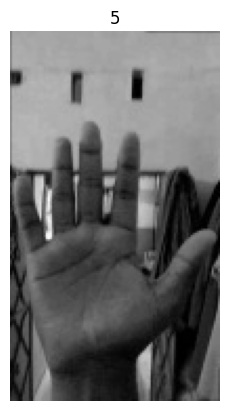

In [8]:
view_random_image('/content/Sign Language for Numbers', '5')

In [9]:
import shutil

shutil.rmtree('/content/Sign Language for Numbers/unknown')

In [10]:
import tensorflow as tf
IMG_SIZE = (100, 100)

data_path = '/content/Sign Language for Numbers'

train_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', color_mode='grayscale', subset='training', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', color_mode='grayscale', subset='validation', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)

Found 15000 files belonging to 10 classes.
Using 12000 files for training.
Found 15000 files belonging to 10 classes.
Using 3000 files for validation.


In [11]:
for images, labels in train_data.take(1):
  print(images.shape)

(32, 100, 100, 1)


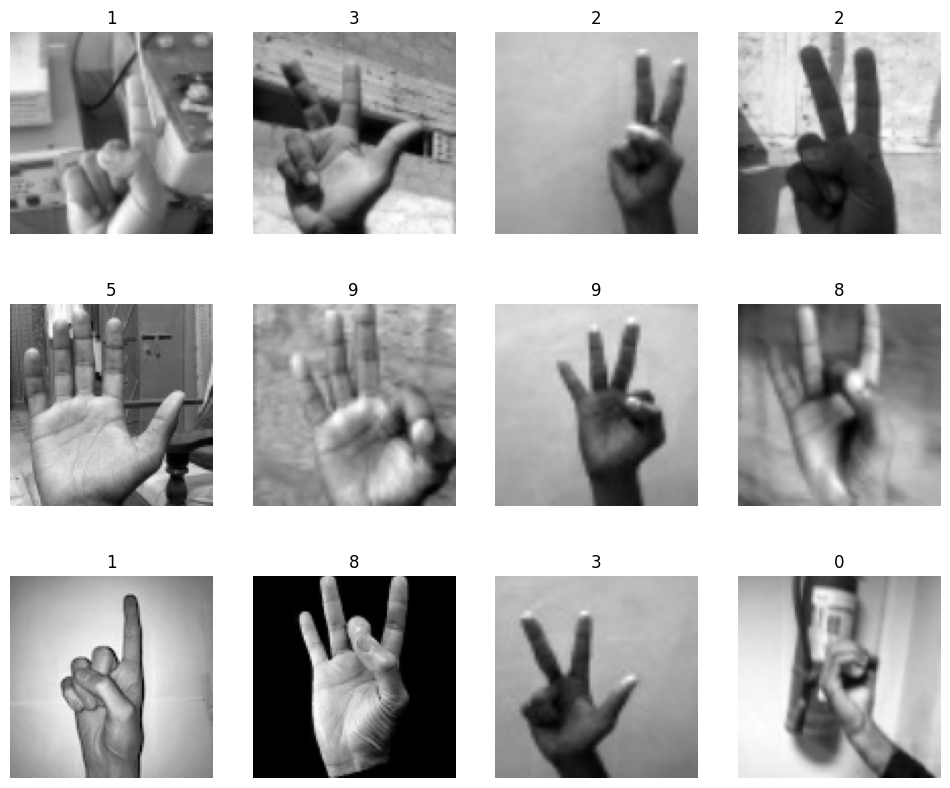

In [12]:
class_names = train_data.class_names

plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i] / 255, cmap='gray')
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis('off')

In [13]:
inputs=tf.keras.layers.Input(shape=(100, 100, 1))

x = tf.keras.applications.efficientnet.preprocess_input(inputs)

x = tf.keras.layers.Concatenate()([inputs, inputs, inputs])

base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation = 'softmax')(avg)

model = tf.keras.Model(inputs=inputs, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
base_model.trainable=False

In [15]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights=True)

check_point = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only = True)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[early_stopping, check_point])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.5731 - loss: 1.4117 - val_accuracy: 0.8250 - val_loss: 0.6459
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8417 - loss: 0.5918 - val_accuracy: 0.8760 - val_loss: 0.4759
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8839 - loss: 0.4422 - val_accuracy: 0.8967 - val_loss: 0.3913
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9039 - loss: 0.3726 - val_accuracy: 0.9073 - val_loss: 0.3452
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9182 - loss: 0.3217 - val_accuracy: 0.9153 - val_loss: 0.3110
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9229 - loss: 0.2910 - val_accuracy: 0.9200 - val_loss: 0.2865
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9361 - loss: 0.2584 - val_accuracy: 0.9290 - val_loss: 0.2645
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9413 - loss: 0.2349 - va

In [17]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9426 - loss: 0.2110


[0.17758974432945251, 0.95333331823349]

In [18]:
model.save("NumberHandSignClassifier.keras")